<h1 align="center" style="color: navy; font-size: 30px;">üöÄ TuberAI: CNN ile T√ºberk√ºloz Te≈ühisi</h1>


## ü©∫ Veri Setine Genel Bakƒ±≈ü

Bu proje, g√∂ƒü√ºs r√∂ntgeni (*Chest X-Ray, CXR*) g√∂r√ºnt√ºlerini kullanarak t√ºberk√ºloz tespiti yapan bir **Convolutional Neural Network (CNN)** projesidir.  
Projedeki genel ama√ß, **t√ºberk√ºloz** ve **normal** g√∂ƒü√ºs r√∂ntgenlerini sƒ±nƒ±flandƒ±rarak CNN ile otomatik tespit yapabilmektir.

Saƒülƒ±k verileri, √∂zellikle **erken te≈ühis** a√ßƒ±sƒ±ndan son derece √∂nem ta≈üƒ±r. Bu t√ºr projeler, hƒ±zlƒ± ve doƒüru tanƒ± koyma konusunda saƒülƒ±k sekt√∂r√ºne yardƒ±mcƒ± olabilir, insan hatasƒ±nƒ± azaltabilir ve hastalarƒ±n uygun tedaviye daha hƒ±zlƒ± ula≈ümasƒ±na katkƒ± saƒülar.  
Bu veri seti de bu titizlik g√∂z √∂n√ºnde bulundurularak analiz edilmi≈ütir.

---

### Veri Seti

- Kaggle √ºzerindeki *Tuberculosis (TB) Chest X-ray Dataset*  
- Her √∂rnek bir g√∂ƒü√ºs r√∂ntgen g√∂r√ºnt√ºs√ºd√ºr  
- Ama√ß: G√∂r√ºnt√º sƒ±nƒ±flandƒ±rma ‚Äî **TB var / yok**  
- Bu veri seti, bir **ikili sƒ±nƒ±flandƒ±rma (binary classification)** problemidir  
- Herkese a√ßƒ±k olan i√ßerik:  
  - 700 TB pozitif g√∂r√ºnt√º  
  - 3500 normal g√∂ƒü√ºs r√∂ntgeni  

---

### üõ† Kullanƒ±lan Teknolojiler ve K√ºt√ºphaneler

- *Python 3.x*
- *NumPy & Pandas*
- *Matplotlib & Seaborn*
- *OpenCV & PIL*
- *TensorFlow / Keras*
- *Scikit-learn*
- *Random*
- *L2 Regularizer*

## 1. Veri Setine Giri≈ü

ƒ∞lk olarak veri seti y√ºklenmi≈ü ve klas√∂r yapƒ±sƒ± incelenmi≈ütir. Kod ile veri setinin yolu tanƒ±mlanmƒ±≈ü ve klas√∂rdeki dosyalar listelenmi≈ütir.

Veri setinin hem **t√ºberk√ºloz (TB)** hem de **normal** sƒ±nƒ±flarƒ± i√ßerdiƒüi, ek olarak *metadata* ve *README* dosyalarƒ±nƒ±n bulunduƒüu g√∂r√ºlmektedir. Bu adƒ±m, veri setinin yapƒ±sƒ±nƒ± anlamak ve sonraki analizler i√ßin hazƒ±rlƒ±k yapmak a√ßƒ±sƒ±ndan √∂nemlidir.

ƒ∞kinci a≈üamada, her iki sƒ±nƒ±ftaki g√∂r√ºnt√ºlerin yapƒ±sƒ±nƒ± ve **dosya isimlendirme formatƒ±nƒ±** anlamak amacƒ±yla iki sƒ±nƒ±ftan √∂rnek dosya isimleri g√∂r√ºnt√ºlenmi≈ütir.


In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import random
from tensorflow.keras.regularizers import l2


data = '/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/'
os.listdir(data)

E0000 00:00:1758919569.490261      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758919569.591756      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


['Normal.metadata.xlsx',
 'Tuberculosis',
 'README.md.txt',
 'Tuberculosis.metadata.xlsx',
 'Normal']

In [2]:
tuberculosis_data= "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis"
print("tuberculosis images :\n" ,os.listdir(tuberculosis_data)[:5])

normal_data= "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal"
print("\nnormal images :\n" ,os.listdir(normal_data)[:5])

tuberculosis images :
 ['Tuberculosis-173.png', 'Tuberculosis-334.png', 'Tuberculosis-309.png', 'Tuberculosis-487.png', 'Tuberculosis-178.png']

normal images :
 ['Normal-859.png', 'Normal-158.png', 'Normal-1811.png', 'Normal-97.png', 'Normal-1088.png']


## 2. Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±

Veri setinin dengeli olup olmadƒ±ƒüƒ±nƒ± incelemek i√ßin her iki sƒ±nƒ±fta ka√ß adet g√∂r√ºnt√º bulunduƒüu kontrol edilmi≈ütir.  
Sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± daha g√∂rsel h√¢le getirmek amacƒ±yla bir bar chart olu≈üturulmu≈ütur.

Veri setindeki sƒ±nƒ±f daƒüƒ±lƒ±mƒ± a≈üaƒüƒ±daki gibidir:

- **Tuberculosis:** 700 g√∂r√ºnt√º  
- **Normal:** 3500 g√∂r√ºnt√º  

Bu durum, veri setinin **dengesiz** olduƒüunu g√∂stermektedir.  
Modelin √∂ƒürenme s√ºrecinde Normal sƒ±nƒ±fƒ±na a≈üƒ±rƒ± aƒüƒ±rlƒ±k vermesi ve TB sƒ±nƒ±fƒ±nƒ± doƒüru tahmin etmede zorlanmasƒ± olasƒ±dƒ±r.  

Normal sƒ±nƒ±fƒ±n √ßubuƒüu, Tuberculosis sƒ±nƒ±fƒ±na g√∂re √ßok daha uzun olacaktƒ±r; bu da dengesizliƒüi net bir ≈üekilde ortaya koymaktadƒ±r.  
Bu problemi √ß√∂zmek i√ßin, model eƒüitiminden √∂nce azƒ±nlƒ±k sƒ±nƒ±fƒ±ndaki (**Tuberculosis**) g√∂r√ºnt√ºlere **data augmentation** uygulanacaktƒ±r. D√∂nd√ºrme, √ßevirme veya parlaklƒ±k deƒüi≈üikliƒüi gibi tekniklerle TB sƒ±nƒ±fƒ± √ße≈üitlendirilecektir.


In [3]:
num_tuberculosis = len(os.listdir(tuberculosis_data))
num_normal = len(os.listdir(normal_data))
total = num_tuberculosis + num_normal

# Sonu√ßlarƒ± pandas DataFrame ile tablo ≈üeklinde g√∂sterdim.
class_counts = pd.DataFrame({
    "Class": ["Tuberculosis", "Normal"],
    "Count": [num_tuberculosis, num_normal],
    "Percent (%)":[num_tuberculosis/total*100,num_normal/total*100]
})

display(class_counts)

Class  Count  Percent (%)
0  Tuberculosis    700    16.666667
1        Normal   3500    83.333333

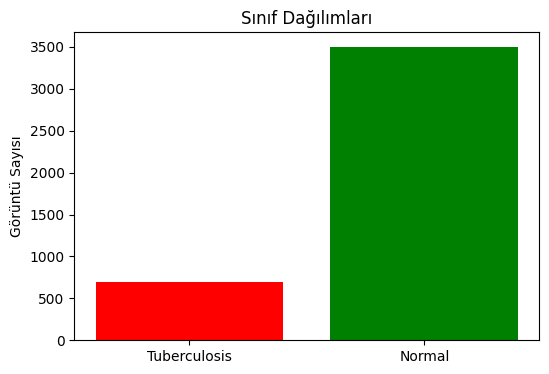

In [4]:
plt.figure(figsize=(6,4))
plt.bar(class_counts["Class"], class_counts["Count"], color=["red", "green"])
plt.title("Sƒ±nƒ±f Daƒüƒ±lƒ±mlarƒ±")
plt.ylabel("G√∂r√ºnt√º Sayƒ±sƒ±")
plt.show()

## 3. G√∂rsellerin Teknik ƒ∞ncelemesi

Bu a≈üamada g√∂rsellerin boyutlarƒ±nƒ±n uyumlu olmasƒ±, √ß√∂z√ºn√ºrl√ºkleri, renk farklƒ±lƒ±klarƒ± ve dosyalarƒ±n eksik veya bozuk olup olmadƒ±ƒüƒ± incelenmi≈ütir.  
CNN modelleri i√ßin bu adƒ±m √∂nemlidir; √ß√ºnk√º modelin girdi katmanƒ±nda kullanƒ±lacak boyutlarƒ±n netle≈ümesi, renk kanallarƒ±nƒ±n doƒüru y√∂netilmesi ve bozuk verilerin ayƒ±klanmasƒ±, eƒüitimin doƒüruluƒüunu doƒürudan etkiler.  
Bu √ßƒ±ktƒ±lar incelenerek model i√ßin uygun input boyutu ve √∂n i≈üleme adƒ±mlarƒ± planlanacaktƒ±r.


### 3.1 G√∂rsellerin Teknik √ñzellikleri

- Veri setindeki t√ºm g√∂rseller **512√ó512 piksel** boyutunda ve **renkli (3 kanal)** formatƒ±ndadƒ±r.  
- G√∂ƒü√ºs r√∂ntgenlerinde renk bilgisi anlamlƒ± olmadƒ±ƒüƒ±ndan, eƒüitimde g√∂rseller **gri tonlamaya (tek kanal)** d√∂n√º≈üt√ºr√ºlecektir.  
- 512√ó512 √ß√∂z√ºn√ºrl√ºk y√ºksek doƒüruluk saƒülasa da eƒüitim s√ºresi a√ßƒ±sƒ±ndan maliyetlidir. Bu nedenle, t√ºm g√∂rseller **224√ó224** boyutuna yeniden boyutlandƒ±rƒ±lacaktƒ±r. Bu yakla≈üƒ±m, GPU bellek kullanƒ±mƒ±nƒ± optimize eder ve eƒüitim s√ºresini kƒ±saltƒ±r.  
- Piksel deƒüerleri **0‚Äì255** aralƒ±ƒüƒ±nda olduƒüundan, model eƒüitiminde veriler **0‚Äì1 aralƒ±ƒüƒ±na normalize** edilecektir.  
- Ek bir √∂n i≈üleme gerek yoktur.  
- Veri setinde bozuk veya eksik dosya bulunmamaktadƒ±r; bu sayede veri temizleme s√ºreci basit olup modelin g√ºvenilir ≈üekilde eƒüitilmesini saƒülamaktadƒ±r.


In [5]:
classes = ["Tuberculosis", "Normal"]

def analyze_images(data_dir, classes, num_samples=3):
    sizes = set()
    modes = set()
    
    for cls in classes:
        cls_dir = os.path.join(data_dir, cls)
        for img_file in os.listdir(cls_dir):
            path = os.path.join(cls_dir, img_file)
            img = cv2.imread(path)
            if img is None:
                print("Bozuk dosya:", path)
                continue
            sizes.add((img.shape[0], img.shape[1])) 
            modes.add(img.shape[2] if len(img.shape)==3 else 1)  
    
    print("Unique boyutlar:", sizes)
    print("Unique kanallar(1=grayscale, 3=RGB):", modes)
    
    sample_img = cv2.imread(os.path.join(data_dir, classes[0], os.listdir(os.path.join(data_dir, classes[0]))[0]))
    print("\nGenel Piksel Deƒüerleri Aralƒ±ƒüƒ± -> Min:", np.min(sample_img), "Max:", np.max(sample_img))
    print("----------------------------------------------------------------------")
    
    print("\nSƒ±nƒ±flardan √ñrnek G√∂rseller: ")
    for cls in classes:
        cls_dir = os.path.join(data_dir, cls)
        sample_files = random.sample(os.listdir(cls_dir), num_samples)
        print(f"\nClass: {cls}")
        for f in sample_files:
            img_path = os.path.join(cls_dir, f)
            img = cv2.imread(img_path)
            if img is None:
                print("  Bozuk dosya:", f)
                continue
            print(f"  {f} -> Min: {np.min(img)}, Max: {np.max(img)}, Shape: {img.shape}")

analyze_images(data, classes)

Unique boyutlar: {(512, 512)}
Unique kanallar(1=grayscale, 3=RGB): {3}

Genel Piksel Deƒüerleri Aralƒ±ƒüƒ± -> Min: 0 Max: 253
----------------------------------------------------------------------

Sƒ±nƒ±flardan √ñrnek G√∂rseller: 

Class: Tuberculosis
  Tuberculosis-483.png -> Min: 0, Max: 225, Shape: (512, 512, 3)
  Tuberculosis-386.png -> Min: 0, Max: 255, Shape: (512, 512, 3)
  Tuberculosis-401.png -> Min: 0, Max: 255, Shape: (512, 512, 3)

Class: Normal
  Normal-1392.png -> Min: 0, Max: 247, Shape: (512, 512, 3)
  Normal-1272.png -> Min: 0, Max: 229, Shape: (512, 512, 3)
  Normal-1298.png -> Min: 0, Max: 255, Shape: (512, 512, 3)


### 3.2 Sƒ±nƒ±f Bazlƒ± Piksel ƒ∞statistikleri

Veri setindeki her sƒ±nƒ±fƒ±n g√∂rselleri i√ßin **ortalama parlaklƒ±k (mean)** ve **kontrast/daƒüƒ±lƒ±m (std)** deƒüerleri hesaplanmƒ±≈ütƒ±r. Elde edilen sonu√ßlar:

- **Normal sƒ±nƒ±f:** Mean = 130.12, Std = 62.05  
- **Tuberculosis sƒ±nƒ±f:** Mean = 125.50, Std = 53.06  

Bu bulgular, TB g√∂rsellerinin ortalama olarak Normal g√∂rsellere g√∂re biraz daha koyu ve daha homojen (daha d√º≈ü√ºk standart sapma) olduƒüunu g√∂stermektedir.  
Sƒ±nƒ±flar arasƒ± bu k√º√ß√ºk parlaklƒ±k ve kontrast farkƒ±, normalizasyon ve veri √∂n i≈üleme stratejilerinin belirlenmesinde yol g√∂sterici olabilir.  

Bu nedenle, t√ºm g√∂rsellerin **0‚Äì1 aralƒ±ƒüƒ±nda normalize edilmesi**, modelin daha stabil ve hƒ±zlƒ± √∂ƒürenmesi i√ßin uygun bir y√∂ntem olarak tercih edilmi≈ütir.


In [6]:
means_all, stds_all = [], []

for i, cls in enumerate(classes):
    cls_dir = os.path.join(data, cls)
    means, stds = [], []
    
    for img_file in os.listdir(cls_dir):
        img = cv2.imread(os.path.join(cls_dir, img_file), cv2.IMREAD_GRAYSCALE)
        means.append(np.mean(img))
        stds.append(np.std(img))
    
    means_all.append(means)
    stds_all.append(stds)
    
    print(f"{cls} - Mean: {np.mean(means):.2f}, Std: {np.mean(stds):.2f}")

Tuberculosis - Mean: 125.50, Std: 53.06
Normal - Mean: 130.12, Std: 62.05


## 4. Verilerin G√∂rselle≈ütirmesi

Bu adƒ±mda, her iki sƒ±nƒ±ftan rastgele se√ßilen birka√ß √∂rnek g√∂r√ºnt√º **grid ≈üeklinde** g√∂sterilmi≈ütir. G√∂rselle≈ütirme, veri setindeki g√∂rsel √ße≈üitliliƒüi ve sƒ±nƒ±flar arasƒ±ndaki farklƒ±lƒ±klarƒ± daha iyi anlamamƒ±za yardƒ±mcƒ± olur.

G√∂zlemler:

- G√∂rseller arasƒ±nda **kontrast** ve **parlaklƒ±k** farklƒ±lƒ±klarƒ± mevcuttur.  
- **Tuberculosis** sƒ±nƒ±fƒ±ndaki g√∂r√ºnt√ºlerde akciƒüerlerde leke, yoƒüunluk veya yapƒ±sal deƒüi≈üiklikler gibi t√ºberk√ºloz belirtileri farklƒ± ≈üekillerde ortaya √ßƒ±kmaktadƒ±r.  
- **Normal** sƒ±nƒ±fƒ±ndaki g√∂r√ºnt√ºler daha homojen olup belirgin patolojik deƒüi≈üiklik i√ßermez.  

Her iki sƒ±nƒ±fƒ±n genel g√∂rsel karakteristikleri ve yoƒüunluk daƒüƒ±lƒ±mlarƒ± farklƒ±dƒ±r; bu durum, modelin sƒ±nƒ±flarƒ± ayƒ±rt etmesi i√ßin √∂nemli bir bilgi saƒülamaktadƒ±r.


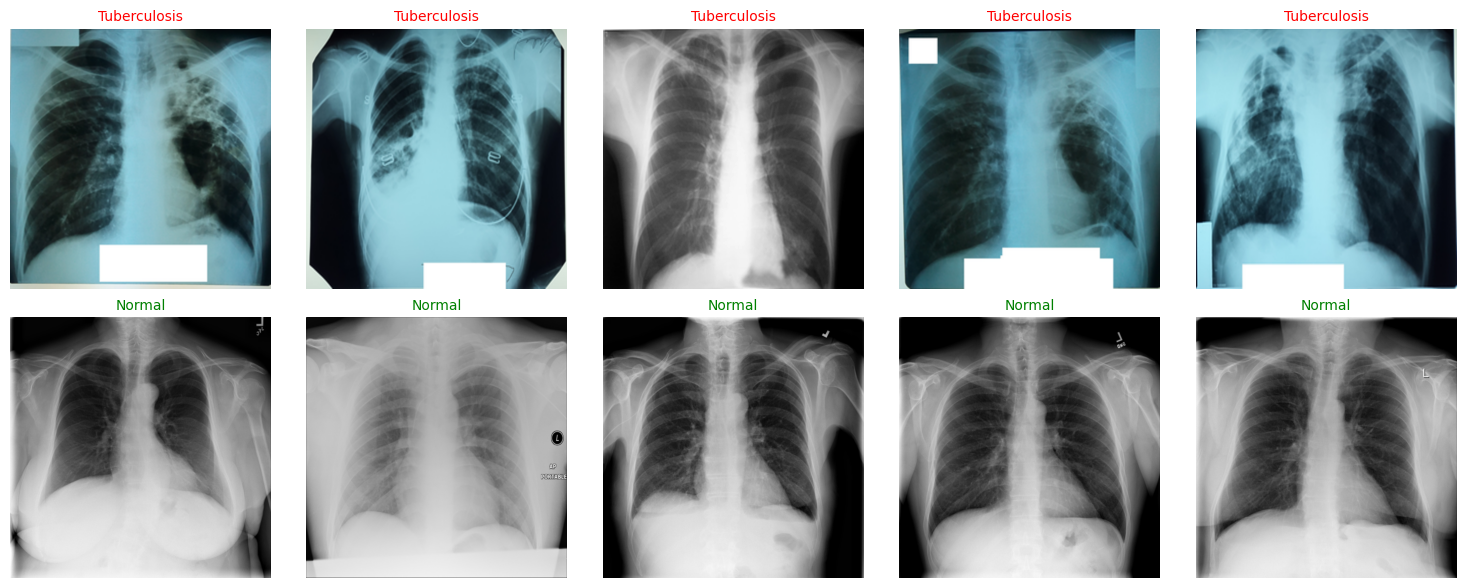

In [7]:
sns.set(style="whitegrid")

n_per_class = 5  # Her sƒ±nƒ±ftan 5 √∂rnek
fig, axs = plt.subplots(len(classes), n_per_class, figsize=(n_per_class*3, len(classes)*3))

for i, cls in enumerate(classes):
    cls_dir = os.path.join(data, cls)
    imgs = [f for f in os.listdir(cls_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))]
    samples = random.sample(imgs, min(len(imgs), n_per_class))
    
    for j, f in enumerate(samples):
        img_path = os.path.join(cls_dir, f)
        img = Image.open(img_path)
        
        ax = axs[i][j] if len(classes) > 1 else axs[j]
        ax.imshow(img,cmap="gray")
        
        color = 'red' if cls == "Tuberculosis" else 'green'
        ax.set_title(cls, color=color, fontsize=10)
        ax.axis('off')

plt.tight_layout()
plt.show()

## 5. Normalizasyon ve Veri √ñni≈üleme

Bu a≈üamada veri seti **train, validation ve test** k√ºmelerine ayrƒ±lmƒ±≈ü ve azƒ±nlƒ±k sƒ±nƒ±f olan **Tuberculosis (TB)** sƒ±nƒ±fƒ± i√ßin **data augmentation** uygulanarak sƒ±nƒ±f daƒüƒ±lƒ±mƒ± dengelenmi≈ütir. ƒ∞≈ülem adƒ±mlarƒ± a≈üaƒüƒ±daki gibidir: 

---

### *5.1 Klas√∂r yapƒ±sƒ± ve sƒ±nƒ±flarƒ±n belirlenmesi:*
   Veri setindeki iki ana sƒ±nƒ±f (*Normal* ve *Tuberculosis*) tespit edilmi≈ü ve ilgili dosya yollarƒ± (`filepaths`) ile etiketler (`labels`) bir DataFrame h√¢line getirilmi≈ütir.  

### *5.2 Train/Validation/Test ayƒ±rƒ±mƒ±:*
   Veri seti, stratified (sƒ±nƒ±f oranlarƒ±nƒ± koruyacak ≈üekilde) bir y√∂ntemle ayrƒ±lmƒ±≈ütƒ±r:  
   - Train: %72.25  
   - Validation: %12.75  
   - Test: %15  
   Bu oranlar, modelin hem √∂ƒürenmesi hem de performans deƒüerlendirmesi i√ßin dengeli bir daƒüƒ±lƒ±m saƒülar.

In [8]:
data_dir = "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
aug_dir = "/kaggle/working/Tuberculosis_augmented_train"
os.makedirs(aug_dir, exist_ok=True)

filepaths = []
labels = []

for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    for fname in os.listdir(cls_dir):
        if fname.lower().endswith(('.png','.jpg','.jpeg')):
            filepaths.append(os.path.join(cls_dir, fname))
            labels.append(cls)

df = pd.DataFrame({'filename': filepaths, 'class': labels})

df_trainval, df_test = train_test_split(df, test_size=0.15, stratify=df['class'], random_state=42)
val_ratio = 0.15 / 0.85  
df_train, df_val = train_test_split(df_trainval, test_size=val_ratio, stratify=df_trainval['class'], random_state=42)

print(f"Train: {len(df_train)}, Validation: {len(df_val)}, Test: {len(df_test)}")

Train: 2940, Validation: 630, Test: 630


### *5.3 Tuberculosis sƒ±nƒ±fƒ±nƒ±n dengelemesi:* 
   Train setindeki TB √∂rnekleri, Normal sƒ±nƒ±f sayƒ±sƒ±na e≈üitlenmek amacƒ±yla **ImageDataGenerator** kullanƒ±larak artƒ±rƒ±lmƒ±≈ütƒ±r.  
   - Uygulanan augmentasyon teknikleri: `rotation_range=20`, `width_shift_range=0.1`, `height_shift_range=0.1`, `zoom_range=0.1`, `horizontal_flip=True`  
   - √úretilen yeni g√∂rseller, `aug_dir` klas√∂r√ºne kaydedilmi≈ü ve train setine eklenmi≈ütir.  
   Bu sayede azƒ±nlƒ±k sƒ±nƒ±fƒ±ndaki √∂rnek sayƒ±sƒ±, √ßoƒüunluk sƒ±nƒ±fƒ±na e≈üitlenerek modelin sƒ±nƒ±flar arasƒ± dengesizliƒüe baƒülƒ± hatalar √ºretmesi √∂nlenmi≈ütir.

In [9]:
tb_train = df_train[df_train['class']=='Tuberculosis'].copy()
num_tb = len(tb_train)
target_tb = df_train['class'].value_counts()['Normal']  # Normal sƒ±nƒ±f sayƒ±sƒ±na e≈üitle
needed = target_tb - num_tb

print(f"Tuberculosis train: {num_tb}, Hedef: {target_tb}, √úretilecek: {needed}")

Tuberculosis train: 490, Hedef: 2450, √úretilecek: 1960


In [10]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

count = 0
for idx, row in tb_train.iterrows():
    if count >= needed:
        break
    img_path = row['filename']
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224,224))
    img = img.reshape((1,224,224,1))
    
    for batch in datagen.flow(img, batch_size=1, save_to_dir=aug_dir,
                              save_prefix='aug', save_format='png'):
        count += 1
        if count >= needed:
            break

print(f"{count} yeni augmented Tuberculosis g√∂rseli √ºretildi")

1960 yeni augmented Tuberculosis g√∂rseli √ºretildi


In [11]:
aug_files = [os.path.join(aug_dir, f) for f in os.listdir(aug_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))]
df_aug = pd.DataFrame({'filename': aug_files, 'class': ['Tuberculosis']*len(aug_files)})

df_train_balanced = pd.concat([df_train, df_aug], ignore_index=True)
print(f"Train setindeki g√ºncel sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:\n{df_train_balanced['class'].value_counts()}")

Train setindeki g√ºncel sƒ±nƒ±f daƒüƒ±lƒ±mƒ±:
class
Normal          2450
Tuberculosis    2270
Name: count, dtype: int64


### *5.4 ImageDataGenerator ile veri y√ºkleyici olu≈üturma:*
   - **Train generator:** normalize edilmi≈ü ve augmentasyon uygulanmƒ±≈ü g√∂rseller ile olu≈üturulmu≈ütur.  
   - **Validation ve test generator:** yalnƒ±zca normalize edilmi≈ü g√∂rseller kullanƒ±lmƒ±≈ütƒ±r.  
   - T√ºm g√∂rseller **224√ó224 piksel** boyutunda ve **grayscale** formatƒ±nda i≈ülenmi≈ütir.  

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    df_train_balanced,
    x_col='filename',
    y_col='class',
    target_size=(224,224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_dataframe(
    df_val,
    x_col='filename',
    y_col='class',
    target_size=(224,224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_dataframe(
    df_test,
    x_col='filename',
    y_col='class',
    target_size=(224,224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 4720 validated image filenames belonging to 2 classes.
Found 630 validated image filenames belonging to 2 classes.
Found 630 validated image filenames belonging to 2 classes.


### *5.5 Sƒ±nƒ±f daƒüƒ±lƒ±mlarƒ±nƒ±n kontrol√º:* 
   - Train seti (augmentation sonrasƒ±) dengelenmi≈ü h√¢le gelmi≈ütir.  
   - Validation ve test setlerinde orijinal daƒüƒ±lƒ±m korunmu≈ütur.  

In [13]:
print("üìä G√ºncel Sƒ±nƒ±f Daƒüƒ±lƒ±mlarƒ±:")
print("Train:")
print(df_train_balanced['class'].value_counts())
print("Validation:")
print(df_val['class'].value_counts())
print("Test:")
print(df_test['class'].value_counts())

üìä G√ºncel Sƒ±nƒ±f Daƒüƒ±lƒ±mlarƒ±:
Train:
class
Normal          2450
Tuberculosis    2270
Name: count, dtype: int64
Validation:
class
Normal          525
Tuberculosis    105
Name: count, dtype: int64
Test:
class
Normal          525
Tuberculosis    105
Name: count, dtype: int64


## 6. Model Mimarisi

Tasarlanan CNN mimarisi, g√∂r√ºnt√º sƒ±nƒ±flandƒ±rma problemleri i√ßin yaygƒ±n olarak kullanƒ±lan katmanlar ve d√ºzenlile≈ütirme tekniklerini i√ßermektedir:  

- **Convolutional Layers**  
  G√∂rsellerden √∂znitelik (feature) √ßƒ±karmak amacƒ±yla 3 adet konvol√ºsyon katmanƒ± kullanƒ±lmƒ±≈ütƒ±r. Bu katmanlar, farklƒ± seviyelerde kenar, ≈üekil ve doku bilgilerini yakalayarak modelin sƒ±nƒ±flar arasƒ±nda ayrƒ±m yapabilmesini saƒülamaktadƒ±r.  

- **Pooling Layers**  
  Her konvol√ºsyon katmanƒ±nƒ±n ardƒ±ndan **MaxPooling (2√ó2)** uygulanmƒ±≈ütƒ±r. Bu sayede boyutlar k√º√ß√ºlt√ºlerek hesaplama maliyeti azaltƒ±lmƒ±≈ü, aynƒ± zamanda √∂zniteliklerin daha genelle≈ütirilmi≈ü bir temsili elde edilmi≈ütir.  

- **Dense (Fully Connected) Layers**  
  Konvol√ºsyon katmanlarƒ±ndan sonra Flatten i≈ülemi ile veriler vekt√∂re d√∂n√º≈üt√ºr√ºlm√º≈ü ve tam baƒülantƒ±lƒ± (dense) katmanlara aktarƒ±lmƒ±≈ütƒ±r.  
  - ƒ∞lk dense katmanda **128 n√∂ron**, **ReLU aktivasyonu** ve **L2 regularizasyonu (0.001)** kullanƒ±lmƒ±≈ütƒ±r.  
  - √áƒ±kƒ±≈ü katmanƒ±nda ise **sigmoid aktivasyonu** ile ikili sƒ±nƒ±flandƒ±rma yapƒ±lmƒ±≈ütƒ±r.  

- **Dropout**  
  A≈üƒ±rƒ± √∂ƒürenmeyi (overfitting) √∂nlemek amacƒ±yla %50 oranƒ±nda dropout uygulanmƒ±≈ütƒ±r. Bu y√∂ntem, eƒüitim sƒ±rasƒ±nda bazƒ± baƒülantƒ±larƒ± devre dƒ±≈üƒ± bƒ±rakarak modelin daha saƒülam bir genelleme yapmasƒ±na katkƒ± saƒülar.  

- **L2 Regularizasyonu**  
  Hem konvol√ºsyon katmanlarƒ±nda hem de dense katmanda **L2 (Ridge) regularizasyonu** uygulanmƒ±≈ütƒ±r. Bu teknik, b√ºy√ºk aƒüƒ±rlƒ±k deƒüerlerini cezalandƒ±rarak modelin daha basit ve genelle≈ütirilebilir bir √ß√∂z√ºm √∂ƒürenmesine yardƒ±mcƒ± olur.  

- **Aktivasyon Fonksiyonlarƒ±**  
  - **ReLU (Rectified Linear Unit):** Konvol√ºsyon ve dense katmanlarƒ±nda kullanƒ±larak doƒürusal olmayan ili≈ükilerin √∂ƒürenilmesine imk√¢n tanƒ±maktadƒ±r.  
  - **Sigmoid:** √áƒ±kƒ±≈ü katmanƒ±nda kullanƒ±larak modelin √ßƒ±ktƒ±sƒ±nƒ±n 0‚Äì1 aralƒ±ƒüƒ±nda bir olasƒ±lƒ±k deƒüeri √ºretmesi saƒülanmƒ±≈ütƒ±r.  

> Bu yapƒ± sayesinde model, g√∂rsellerden anlamlƒ± √∂znitelikleri √ßƒ±karƒ±p genelle≈ütirebilmekte, d√ºzenlile≈ütirme teknikleriyle (Dropout + L2) a≈üƒ±rƒ± √∂ƒürenme riski azaltƒ±lmakta ve ikili sƒ±nƒ±flandƒ±rma g√∂revini ba≈üarƒ±yla yerine getirebilecek kapasiteye ula≈ümaktadƒ±r.  


In [14]:
input_layer = Input(shape=(224,224,1))

x = Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001))(input_layer)
x = MaxPooling2D(2,2)(x)

x = Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001))(x)
x = MaxPooling2D(2,2)(x)

x = Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001), name='last_conv')(x)
x = MaxPooling2D(2,2)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)

I0000 00:00:1758919731.481209      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758919731.482016      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


### 6.2 Modelin Derlenmesi  

Modelin eƒüitime hazƒ±r hale getirilmesi i√ßin derleme (compile) a≈üamasƒ±nda a≈üaƒüƒ±daki ayarlar yapƒ±lmƒ±≈ütƒ±r:  

- **Optimizer:** `Adam`  
  - Adaptif √∂ƒürenme oranƒ±na sahip olduƒüundan, eƒüitim s√ºrecinde parametre g√ºncellemelerini dengeli bir ≈üekilde ger√ßekle≈ütirmektedir.  

- **Loss Function:** `Binary Crossentropy`  
  - ƒ∞kili sƒ±nƒ±flandƒ±rma problemi (Normal / T√ºberk√ºloz) i√ßin en uygun kayƒ±p fonksiyonu tercih edilmi≈ütir. Modelin tahmin ettiƒüi olasƒ±lƒ±klar ile ger√ßek etiketler arasƒ±ndaki farkƒ± minimize eder.  

- **Metrics:** `Accuracy`  
  - Eƒüitim ve doƒürulama s√ºrecinde modelin ba≈üarƒ±mƒ±nƒ± √∂l√ßmek i√ßin doƒüruluk (accuracy) metriƒüi kullanƒ±lmƒ±≈ütƒ±r.  

Ayrƒ±ca, `model.summary()` fonksiyonu ile modelin katman yapƒ±sƒ±, her katmandaki parametre sayƒ±sƒ± ve toplam parametre sayƒ±sƒ± g√∂r√ºnt√ºlenmi≈ütir. Bu √∂zet tablo, modelin mimarisini ve karma≈üƒ±klƒ±ƒüƒ±nƒ± incelemek i√ßin kullanƒ±lmƒ±≈ütƒ±r.  


In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer (InputLayer)        ‚îÇ (None, 224, 224, 1)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 222, 222, 32)   ‚îÇ           320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 111, 111, 32)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 109, 109, 64)   ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 54, 54, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ last_conv (Conv2D)              ‚îÇ (None, 52, 52, 128)    ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 26, 26, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 86528)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ    11,075,712 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 1)              ‚îÇ           129 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 11,168,513 (42.60 MB)

 Trainable params: 11,168,513 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

### 6.3 Modelin Eƒüitilmesi  

Model, `fit()` fonksiyonu ile 15 epoch boyunca eƒüitilmi≈ütir.  
Eƒüitim i√ßin `train_generator`, doƒürulama i√ßin `val_generator` kullanƒ±lmƒ±≈ütƒ±r.  
Eƒüitim s√ºreci boyunca doƒüruluk (accuracy) ve kayƒ±p (loss) deƒüerleri `history` deƒüi≈ükeninde saklanmƒ±≈ütƒ±r.  


In [16]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1758919737.049708      65 service.cc:148] XLA service 0x7aa8e0004970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758919737.051599      65 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758919737.051623      65 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758919737.508136      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23:26 10s/step - accuracy: 0.5625 - loss: 1.0746

I0000 00:00:1758919743.847788      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


148/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61s 353ms/step - accuracy: 0.7781 - loss: 0.7066 - val_accuracy: 0.8905 - val_loss: 0.4194
Epoch 2/15
148/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 319ms/step - accuracy: 0.9166 - loss: 0.3419 - val_accuracy: 0.8889 - val_loss: 0.3819
Epoch 3/15
148/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 316ms/step - accuracy: 0.9202 - loss: 0.3027 - val_accuracy: 0.8937 - val_loss: 0.3495
Epoch 4/15
148/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 317ms/step - accuracy: 0.9259 - loss: 0.2717 - val_accuracy: 0.9238 - val_loss: 0.2990
Epoch 5/15
148/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 316ms/step - accuracy: 0.9371 - loss: 0.2347 - val_accuracy: 0.9143 - val_loss: 0.3037
Epoch 6/15
148/148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 318ms/step - accuracy: 0.9432 - loss: 0.2333 - val_accuracy: 0.9159 - va

### 6.4 Modelin Deƒüerlendirilmesi

Model 15 epoch boyunca eƒüitilmi≈ü ve eƒüitim ile doƒürulama performanslarƒ± takip edilmi≈ütir.  

- **Eƒüitim ve Doƒürulama Performansƒ±:**  
  - Modelin eƒüitim doƒüruluƒüu (accuracy) ilk epochlarda %77 civarƒ±ndayken, son epochlarda %95 seviyelerine ula≈ümƒ±≈ütƒ±r.  
  - Doƒürulama doƒüruluƒüu ise ilk ba≈üta %89, son epochlarda %93.8 olarak ger√ßekle≈ümi≈ütir.  
  - Kayƒ±p (loss) deƒüerleri eƒüitim boyunca azalmƒ±≈ü ve son epochlarda minimuma yakla≈ümƒ±≈ütƒ±r.  

- **√ñƒürenme Eƒüilimi ve Genelleme:**  
  - Eƒüitim doƒüruluƒüunun s√ºrekli artmasƒ± ve doƒürulama doƒüruluƒüunun da benzer bir trend g√∂stermesi, modelin veriyi iyi √∂ƒürenmeye ba≈üladƒ±ƒüƒ±nƒ± ve a≈üƒ±rƒ± √∂ƒürenme (overfitting) riskinin minimal olduƒüunu g√∂stermektedir.  
  - Epoch 3‚Äì4 civarƒ±nda doƒürulama doƒüruluƒüunda k√º√ß√ºk dalgalanmalar g√∂r√ºlse de, bu normal bir durumdur ve modelin √∂ƒürenme s√ºrecinde k√º√ß√ºk ayarlamalar yaptƒ±ƒüƒ± anlamƒ±na gelir.  
  - Son epochlarda doƒürulama doƒüruluƒüunun eƒüitim doƒüruluƒüuna yakƒ±n olmasƒ±, modelin hem eƒüitim hem de daha √∂nce g√∂rmediƒüi veriler √ºzerinde saƒülam bir genelleme yapabildiƒüini g√∂stermektedir.  

- **Test Seti Performansƒ±:**  
  - Model, test seti √ºzerinde %93.17 doƒüruluk elde etmi≈ütir.  
  - Bu y√ºksek doƒüruluk, modelin hem TB hem de normal sƒ±nƒ±flarƒ± ayƒ±rt etmede ba≈üarƒ±lƒ± olduƒüunu ve sƒ±nƒ±f dengesizliƒüine raƒümen iyi genelleme yaptƒ±ƒüƒ±nƒ± doƒürulamaktadƒ±r.  

> Genel olarak, model hem √∂ƒürenme kapasitesini doƒüru kullanmƒ±≈ü hem de overfitting olmadan sƒ±nƒ±flar arasƒ±ndaki ayrƒ±mƒ± ba≈üarƒ±yla ger√ßekle≈ütirmi≈ütir.  


In [17]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_acc:.4f}")

20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 290ms/step - accuracy: 0.9452 - loss: 0.1990
Test Accuracy: 0.9476


## 7. Accuracy & Loss Grafikleri

A≈üaƒüƒ±daki grafikler, modelin 15 epoch boyunca eƒüitim ve doƒürulama performansƒ±nƒ± g√∂stermektedir. 

- **Accuracy Grafiƒüi:**  
  - Eƒüitim doƒüruluƒüu s√ºrekli artarak %95.17 civarƒ±na ula≈ümƒ±≈ütƒ±r.  
  - Doƒürulama doƒüruluƒüu da benzer bir trend izlemi≈ü ve son epochlarda %93.81 seviyesine √ßƒ±kmƒ±≈ütƒ±r. 
  - Doƒürulama doƒüruluƒüundaki k√º√ß√ºk dalgalanmalar, modelin veri setindeki √ße≈üitliliƒüe tepki verdiƒüini ve √∂ƒürenme s√ºrecinde k√º√ß√ºk ayarlamalar yaptƒ±ƒüƒ±nƒ± g√∂stermektedir.  

- **Loss Grafiƒüi:**  
  - Eƒüitim kaybƒ± (loss) d√ºzenli ≈üekilde azalmƒ±≈ü ve son epochlarda minimuma yakla≈ümƒ±≈ütƒ±r.  
  - Doƒürulama kaybƒ±nda da genel olarak d√º≈ü√º≈ü g√∂zlemlenmekte, ancak bazƒ± epochlarda hafif y√ºkselmeler, yine sƒ±nƒ±f dengesizliƒüi ve veri √ße≈üitliliƒüinden kaynaklanan k√º√ß√ºk dalgalanmalarƒ± yansƒ±tmaktadƒ±r.  

- **Genelleme ve Overfitting Analizi:**  
  - Eƒüitim ve doƒürulama doƒüruluklarƒ±nƒ±n birbirine yakƒ±n olmasƒ±, modelin overfitting yapmadƒ±ƒüƒ±nƒ± ve genelleme yeteneƒüinin g√º√ßl√º olduƒüunu g√∂stermektedir.  
  - Doƒürulama kaybƒ±nƒ±n eƒüitim kaybƒ±na yakƒ±n olmasƒ± da modelin veri setinde saƒülam bir √∂ƒürenme ger√ßekle≈ütirdiƒüini doƒürular.  

> Genel olarak, grafikler modelin t√ºberk√ºloz ve normal sƒ±nƒ±flarƒ± ayƒ±rt etmede ba≈üarƒ±lƒ± bir ≈üekilde √∂ƒürenmi≈ü olduƒüunu, k√º√ß√ºk dalgalanmalarƒ±n ise normal √∂ƒürenme s√ºreci i√ßerisinde beklenen varyasyonlar olduƒüunu g√∂stermektedir. Modelin test doƒüruluƒüu %93.17 olarak √∂l√ß√ºlm√º≈üt√ºr ve bu, modelin genel performansƒ±nƒ±n y√ºksek olduƒüunu desteklemektedir.



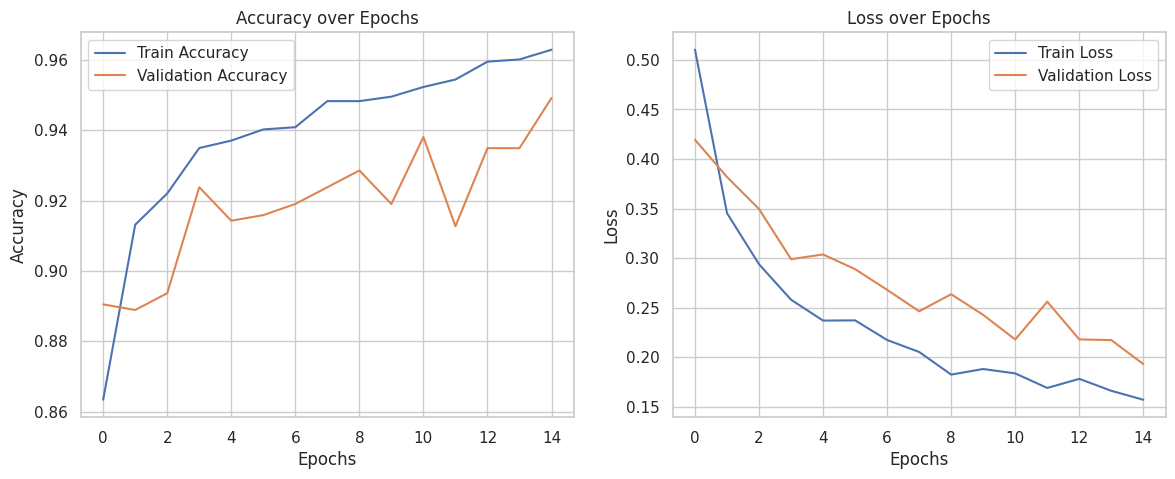

In [18]:
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()

## 8. Genel Model Deƒüerlendirmesi

Bu b√∂l√ºmde, eƒüitilen CNN modelimizin performansƒ± karƒ±≈üƒ±klƒ±k matrisi ve sƒ±nƒ±flandƒ±rma raporu √ºzerinden detaylƒ± olarak incelenmi≈ütir.

---

### 8.1. Karƒ±≈üƒ±klƒ±k Matrisi

|                 | Predicted Normal | Predicted Tuberculosis |
|-----------------|----------------|-----------------------|
| **Actual Normal**       | 518            | 7                     |
| **Actual Tuberculosis** | 36             | 69                    |


- **Normal sƒ±nƒ±fƒ±:** 525 √∂rnekten 518 doƒüru sƒ±nƒ±flandƒ±rƒ±lmƒ±≈ütƒ±r. Model, saƒülƒ±klƒ± bireyleri tespit etmede olduk√ßa ba≈üarƒ±lƒ±dƒ±r. Yanlƒ±≈ü pozitif sayƒ±sƒ± (False Positive) sadece 7‚Äôdur. Bu y√ºksek doƒüruluk, modelin saƒülƒ±klƒ± bireyleri tespit etmede olduk√ßa ba≈üarƒ±lƒ± olduƒüunu g√∂stermektedir. False Positive sayƒ±sƒ±nƒ±n d√º≈ü√ºk olmasƒ±, modelin Normal √∂rnekleri yanlƒ±≈ülƒ±kla hastalƒ±k olarak i≈üaretleme eƒüiliminin az olduƒüunu ifade eder.  
- **T√ºberk√ºloz sƒ±nƒ±fƒ±:** 105 √∂rnekten 69 doƒüru sƒ±nƒ±flandƒ±rƒ±lmƒ±≈ü, 36 √∂rnek yanlƒ±≈ülƒ±kla Normal olarak tahmin edilmi≈ütir. False Negative sayƒ±sƒ±nƒ±n y√ºksek olmasƒ±, kritik hastalƒ±k vakalarƒ±nƒ±n atlanabileceƒüini g√∂stermektedir. T√ºberk√ºloz verisinin daha √ßok olmasƒ± durumunda ba≈üarƒ±sƒ± arttƒ±rƒ±lƒ±r.

---

### 8.2. Classification Report

T√ºberk√ºloz sƒ±nƒ±fƒ±: Modelin precision ve recall deƒüerleri sƒ±rasƒ±yla 0.94 ve 0.99 olarak hesaplanmƒ±≈ütƒ±r. Y√ºksek recall deƒüeri, modelin t√ºberk√ºloz vakalarƒ±nƒ±n b√ºy√ºk √ßoƒüunluƒüunu doƒüru ≈üekilde tespit ettiƒüini g√∂stermektedir. F1-score 0.96 ile sƒ±nƒ±fƒ±n genel performansƒ±nƒ±n olduk√ßa iyi olduƒüunu doƒürulamaktadƒ±r.

Normal sƒ±nƒ±fƒ±: Precision 0.91 olarak iyi seviyede olmasƒ±na raƒümen recall 0.66‚Äôdƒ±r. Bu durum, modelin bazƒ± saƒülƒ±klƒ± √∂rnekleri yanlƒ±≈ülƒ±kla t√ºberk√ºloz olarak sƒ±nƒ±flandƒ±rdƒ±ƒüƒ±nƒ± (False Negative) g√∂stermektedir. Bu sonu√ß, √∂zellikle klinik uygulamalarda gereksiz alarm riskini i≈üaret etmektedir.


20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 263ms/step


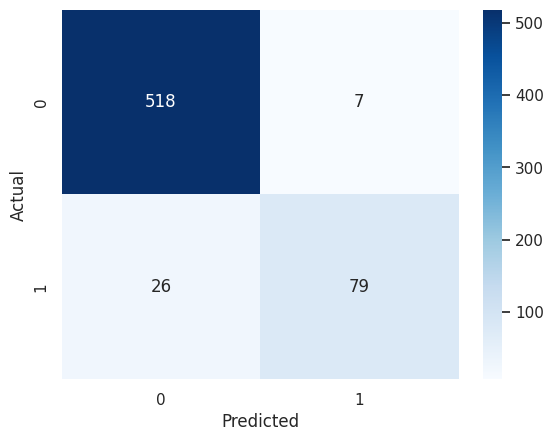

              precision    recall  f1-score   support

Tuberculosis       0.95      0.99      0.97       525
      Normal       0.92      0.75      0.83       105

    accuracy                           0.95       630
   macro avg       0.94      0.87      0.90       630
weighted avg       0.95      0.95      0.95       630



In [19]:
# Test tahminleri
y_pred = model.predict(test_generator)
y_pred_classes = np.where(y_pred>0.5, 1, 0)

# Ger√ßek etiketler
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=classes))


## 9. Grad-CAM ile G√∂rselle≈ütirme

Bu kod, eƒüitilen CNN modelimizin **hangi b√∂lgelerden etkilenerek sƒ±nƒ±flandƒ±rma yaptƒ±ƒüƒ±**nƒ± g√∂rselle≈ütirmek i√ßin Grad-CAM (Gradient-weighted Class Activation Mapping) tekniƒüini uygular.


- **Ama√ß:** Modelin sƒ±nƒ±flandƒ±rma kararlarƒ±nƒ± g√∂rselle≈ütirmek. √ñzellikle tƒ±bbi g√∂r√ºnt√ºlerde, modelin **hastalƒ±klƒ± b√∂lgeleri doƒüru ≈üekilde fark edip etmediƒüini** analiz etmek i√ßin kullanƒ±lƒ±r.  
- **Teknik:** Grad-CAM, son konvol√ºsyon katmanƒ± √ßƒ±kƒ±≈ülarƒ±nƒ± ve hedef sƒ±nƒ±f i√ßin gradyanlarƒ± kullanarak, sƒ±nƒ±fa en √ßok katkƒ±da bulunan b√∂lgeleri vurgulayan bir heatmap √ºretir.  
- **Neden son konvol√ºsyon katmanƒ±:** Bu katman, hem y√ºksek d√ºzeyde √∂zellik √ßƒ±karƒ±r hem de konumsal bilgiyi korur; b√∂ylece heatmap, g√∂r√ºnt√º √ºzerinde anlamlƒ± b√∂lgeleri g√∂sterebilir.

---

### 9.2 Kodun ƒ∞≈üleyi≈üi

1. **Ara model olu≈üturma:**  
   Modelin son konvol√ºsyon katmanƒ± ve √ßƒ±ktƒ±sƒ± alƒ±nƒ±r (`grad_model`).  

2. **Gradient hesaplama:**  
   - Tahmin edilen sƒ±nƒ±f (veya varsayƒ±lan olarak en y√ºksek olasƒ±lƒ±klƒ± sƒ±nƒ±f) se√ßilir.  
   - `GradientTape` ile bu sƒ±nƒ±fƒ±n √ßƒ±kƒ±≈üƒ± ve konvol√ºsyon katmanƒ± √ßƒ±kƒ±≈üƒ± arasƒ±ndaki gradyanlar hesaplanƒ±r.  

3. **Heatmap olu≈üturma:**  
   - Gradyanlar t√ºm uzaysal boyutlar √ºzerinden ortalanƒ±r (pooled_grads).  
   - Bu deƒüerler, konvol√ºsyon √ßƒ±kƒ±≈ülarƒ±yla √ßarpƒ±larak sƒ±nƒ±fa en √ßok katkƒ±da bulunan b√∂lgeler tespit edilir.  
   - Sonu√ß normalize edilip pozitif deƒüerler alƒ±nƒ±r ve heatmap √ºretilir.

4. **G√∂rselle≈ütirme:**  
   - Heatmap, orijinal g√∂r√ºnt√º ile birle≈üir (`addWeighted`) ve modelin hangi alanlara dikkat ettiƒüini g√∂rselle≈ütirir.  
   - Birden fazla √∂rnek i√ßin yan yana orijinal ve Grad-CAM g√∂r√ºnt√ºleri g√∂sterilir.


In [20]:
def make_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model([img_array])  # <- listeye aldƒ±k
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1
    return heatmap  

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=['Tensor(shape=(1, 224, 224, 1))']
  warnings.warn(msg)


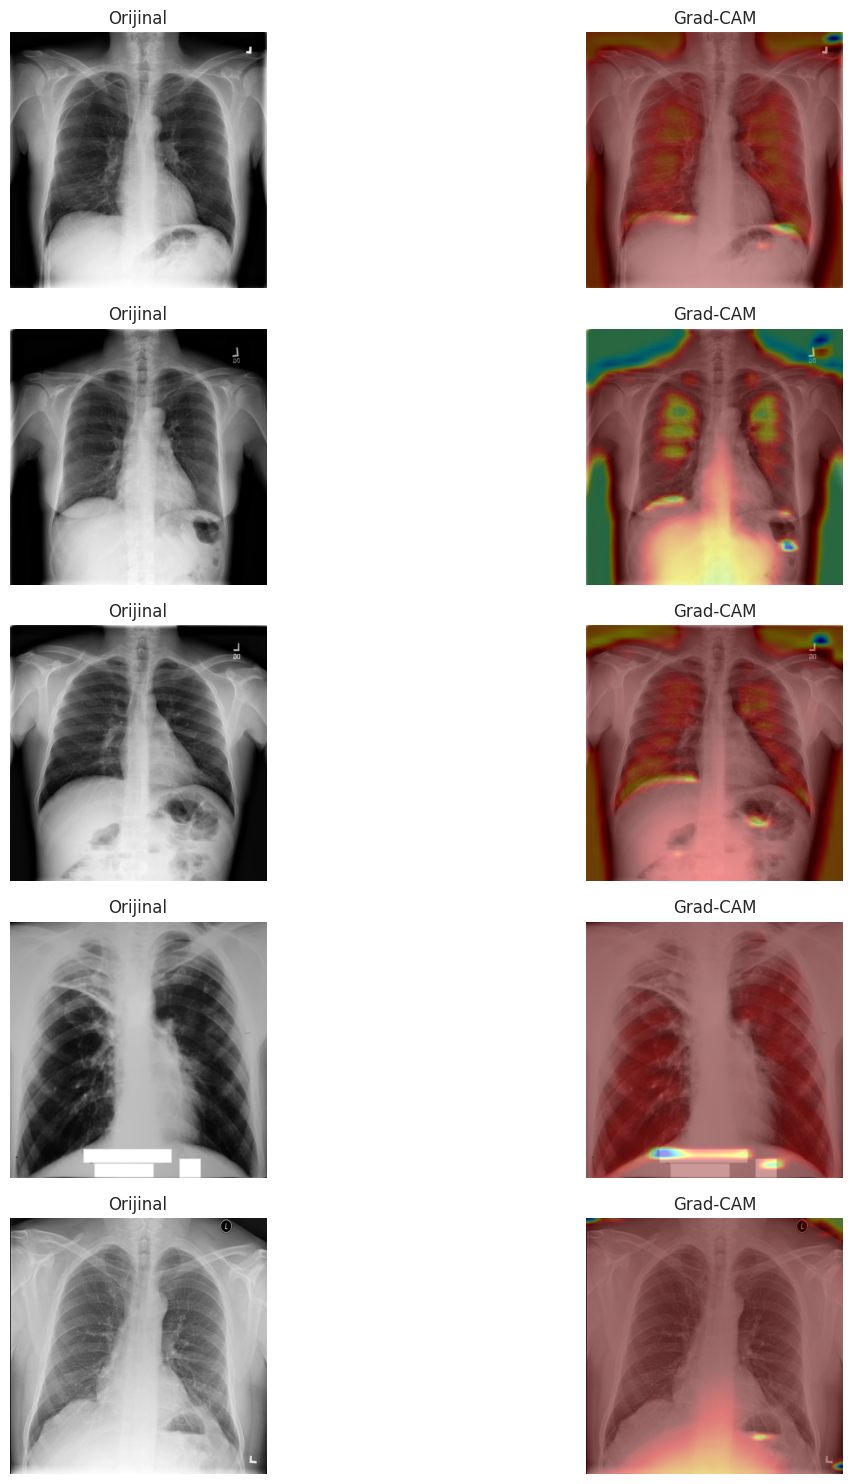

In [21]:
num_examples = 5
example_paths = df_test['filename'].sample(num_examples, random_state=42).tolist()

plt.figure(figsize=(15, num_examples*3))

for i, img_path in enumerate(example_paths):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (224,224))
    input_img = img_resized.reshape((1,224,224,1)) / 255.0

    heatmap = make_gradcam_heatmap(model, input_img, 'last_conv')
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

    superimposed_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    superimposed_img = cv2.addWeighted(superimposed_img, 0.6, heatmap_colored, 0.4, 0)

    plt.subplot(num_examples, 2, i*2+1)
    plt.imshow(img, cmap='gray')
    plt.title('Orijinal')
    plt.axis('off')

    plt.subplot(num_examples, 2, i*2+2)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 10. Hiperparametre Optimizasyonu

Bu b√∂l√ºmde, CNN modelimizin hiperparametrelerini optimize etmek i√ßin Keras Tuner‚Äôƒ±n Hyperband algoritmasƒ± kullanƒ±lmƒ±≈ütƒ±r. Hyperband, kaynaklarƒ± daha verimli kullanarak iyi performans g√∂steren modelleri hƒ±zlƒ±ca bulmayƒ± ama√ßlar.

In [22]:
from kerastuner.tuners import Hyperband

tuner = Hyperband(
    MyHyperModel(),
    objective='val_accuracy',
    max_epochs=10,          
    factor=3,              
    directory='tuner_results',
    project_name='tb_cnn_hb'
)

tuner.search(train_generator, validation_data=val_generator)
best_model = tuner.get_best_models(num_models=1)[0]


/tmp/ipykernel_19/4096110522.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


NameError: name 'MyHyperModel' is not defined